<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/FasterRcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! mkdir /content/gdrive/MyDrive/simpsons-data

In [ ]:
! cd /content/gdrive/MyDrive/simpsons-data

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/simpsons-data')

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/')

In [ ]:
! git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (49/49), done.


In [ ]:
! cp -r ./simpsons-data/simpsons_dataset ./ObjectDetection/

In [ ]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/ObjectDetection


In [ ]:
!cp -r ./simpsons-data/kaggle_simpson_testset/kaggle_simpson_testset ./ObjectDetection/

cp: cannot stat './simpsons-data/kaggle_simpson_testset/kaggle_simpson_testset': No such file or directory


#[Problem 1] Learning and Estimation

In [19]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/ObjectDetection')

In [20]:
!pwd
!pip install keras==2.2.0
!pip install tensorflow==1.15
!pip install Keras-Applications==1.0.7

/content/gdrive/MyDrive/Colab Notebooks/ObjectDetection
  Using cached Keras_Preprocessing-1.0.1-py2.py3-none-any.whl (26 kB)
  Using cached Keras_Applications-1.0.2-py2.py3-none-any.whl (43 kB)
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Attempting uninstall: keras-applications
    Found existing installation: Keras-Applications 1.0.7
    Uninstalling Keras-Applications-1.0.7:
      Successfully uninstalled Keras-Applications-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires keras-applications>=1.0.8, but you have keras-applications 1.0.2 which is incompatible.
tensorflow 1.15.0 requires keras-preprocessing>=1.0.5, but you have keras-preprocessing 1.0.1 which is incompat

In [21]:
! python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Traceback (most recent call last):
  File "train.py", line 193, in <module>
    main()
  File "train.py", line 54, in main
    all_imgs, classes_count, class_mapping = get_data(args.path)
  File "/content/gdrive/MyDrive/Colab Notebooks/ObjectDetection/model/parser.py", line 26, in get_data
    img = cv2.imread(filename)
KeyboardInterrupt


#Testing

In [22]:
! pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 15.7 MB 32.8 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires keras-applications>=1.0.8, but you have keras-applications 1.0.7 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
keras 2.2.0 requires keras-applications==1.0.2, but you h

In [ ]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/ObjectDetection


In [ ]:
! python predict.py -i  ./kaggle_simpson_testset -c ./save/train_20220425-164406_config.pickle 

Using TensorFlow backend.










2022-04-25 18:28:29.156445: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-04-25 18:28:29.161281: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-04-25 18:28:29.161762: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d6acd40700 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-25 18:28:29.161799: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-04-25 18:28:29.163814: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-25 18:28:29.177012: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-25 18:28:29.177058: I tensorflow/stream_ex

#[Problem 2] Code reading
Code that realizes RPN
Path:

ObjectDetection/model/resnet.py
Code:
```
def rpn(base_layers,num_anchors):

    x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

    x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
    x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

    return [x_class, x_regr, base_layers]

```

###Code of RoI pooling
Path:

ObjectDetection/model/RoiPoolingConv.py
Code:
```
class RoiPoolingConv(Layer):
    '''ROI pooling layer for 2D inputs.
    See Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition,
    K. He, X. Zhang, S. Ren, J. Sun
    # Arguments
        pool_size: in
            Size of pooling region to use. pool_size = 7 will result in a 7x7 region.
        num_rois: number of regions of interest to be used
    # Input shape
        list of two 4D tensors [X_img,X_roi] with shape:
        X_img:
        `(1, channels, rows, cols)` if dim_ordering='th'
        or 4D tensor with shape:
        `(1, rows, cols, channels)` if dim_ordering='tf'.
        X_roi:
        `(1,num_rois,4)` list of rois, with ordering (x,y,w,h)
    # Output shape
        3D tensor with shape:
        `(1, num_rois, channels, pool_size, pool_size)`
    '''
    def __init__(self, pool_size, num_rois, **kwargs):

        self.dim_ordering = K.image_data_format()
        assert self.dim_ordering in {'channels_last', 'channels_first'}, 'dim_ordering must be in {channels_last, channels_first}'

        self.pool_size = pool_size
        self.num_rois = num_rois

        super(RoiPoolingConv, self).__init__(**kwargs)

    def build(self, input_shape):
        if self.dim_ordering == 'channels_first':
            self.nb_channels = input_shape[0][1]
        elif self.dim_ordering == 'channels_last':
            self.nb_channels = input_shape[0][3]

    def compute_output_shape(self, input_shape):
        if self.dim_ordering == 'channels_first':
            return None, self.num_rois, self.nb_channels, self.pool_size, self.pool_size
        else:
            return None, self.num_rois, self.pool_size, self.pool_size, self.nb_channels

    def call(self, x, mask=None):

        assert(len(x) == 2)

        img = x[0]
        rois = x[1]

        input_shape = K.shape(img)

        outputs = []

        for roi_idx in range(self.num_rois):

            x = rois[0, roi_idx, 0]
            y = rois[0, roi_idx, 1]
            w = rois[0, roi_idx, 2]
            h = rois[0, roi_idx, 3]

            row_length = w / float(self.pool_size)
            col_length = h / float(self.pool_size)

            num_pool_regions = self.pool_size

            #NOTE: the RoiPooling implementation differs between theano and tensorflow due to the lack of a resize op
            # in theano. The theano implementation is much less efficient and leads to long compile times

            if self.dim_ordering == 'channels_first':
                for jy in range(num_pool_regions):
                    for ix in range(num_pool_regions):
                        x1 = x + ix * row_length
                        x2 = x1 + row_length
                        y1 = y + jy * col_length
                        y2 = y1 + col_length

                        x1 = K.cast(x1, 'int32')
                        x2 = K.cast(x2, 'int32')
                        y1 = K.cast(y1, 'int32')
                        y2 = K.cast(y2, 'int32')

                        x2 = x1 + K.maximum(1,x2-x1)
                        y2 = y1 + K.maximum(1,y2-y1)

                        new_shape = [input_shape[0], input_shape[1],
                                     y2 - y1, x2 - x1]

                        x_crop = img[:, :, y1:y2, x1:x2]
                        xm = K.reshape(x_crop, new_shape)
                        pooled_val = K.max(xm, axis=(2, 3))
                        outputs.append(pooled_val)

            elif self.dim_ordering == 'channels_last':
                x = K.cast(x, 'int32')
                y = K.cast(y, 'int32')
                w = K.cast(w, 'int32')
                h = K.cast(h, 'int32')

                rs = tf.image.resize_images(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
                outputs.append(rs)

        final_output = K.concatenate(outputs, axis=0)
        final_output = K.reshape(final_output, (1, self.num_rois, self.pool_size, self.pool_size, self.nb_channels))

        if self.dim_ordering == 'channels_first':
            final_output = K.permute_dimensions(final_output, (0, 1, 4, 2, 3))
        else:
            final_output = K.permute_dimensions(final_output, (0, 1, 2, 3, 4))

        return final_output

```

###Code of loss functions
Path:

ObjectDetection/model/losses.py
Code:
```
from keras import backend as K
from keras.objectives import categorical_crossentropy

if K.image_data_format() == 'channels_last':
    import tensorflow as tf

lambda_rpn_regr = 1.0
lambda_rpn_class = 1.0

lambda_cls_regr = 1.0
lambda_cls_class = 1.0

epsilon = 1e-4


def rpn_loss_regr(num_anchors):
    def rpn_loss_regr_fixed_num(y_true, y_pred):
        if K.image_data_format() == 'channels_first':
            x = y_true[:, 4 * num_anchors:, :, :] - y_pred
            x_abs = K.abs(x)
            x_bool = K.less_equal(x_abs, 1.0)
            return lambda_rpn_regr * K.sum(
                y_true[:, :4 * num_anchors, :, :] * (x_bool * (0.5 * x * x) + (1 - x_bool) * (x_abs - 0.5))) / K.sum(epsilon + y_true[:, :4 * num_anchors, :, :])
        else:
            x = y_true[:, :, :, 4 * num_anchors:] - y_pred
            x_abs = K.abs(x)
            x_bool = K.cast(K.less_equal(x_abs, 1.0), tf.float32)

            return lambda_rpn_regr * K.sum(
                y_true[:, :, :, :4 * num_anchors] * (x_bool * (0.5 * x * x) + (1 - x_bool) * (x_abs - 0.5))) / K.sum(epsilon + y_true[:, :, :, :4 * num_anchors])

    return rpn_loss_regr_fixed_num


def rpn_loss_cls(num_anchors):
    def rpn_loss_cls_fixed_num(y_true, y_pred):
        if K.image_data_format() == 'channels_last':
            return lambda_rpn_class * K.sum(y_true[:, :, :, :num_anchors] * K.binary_crossentropy(y_pred[:, :, :, :], y_true[:, :, :, num_anchors:])) / K.sum(epsilon + y_true[:, :, :, :num_anchors])
        else:
            return lambda_rpn_class * K.sum(y_true[:, :num_anchors, :, :] * K.binary_crossentropy(y_pred[:, :, :, :], y_true[:, num_anchors:, :, :])) / K.sum(epsilon + y_true[:, :num_anchors, :, :])

    return rpn_loss_cls_fixed_num


def class_loss_regr(num_classes):
    def class_loss_regr_fixed_num(y_true, y_pred):
        x = y_true[:, :, 4*num_classes:] - y_pred
        x_abs = K.abs(x)
        x_bool = K.cast(K.less_equal(x_abs, 1.0), 'float32')
        return lambda_cls_regr * K.sum(y_true[:, :, :4*num_classes] * (x_bool * (0.5 * x * x) + (1 - x_bool) * (x_abs - 0.5))) / K.sum(epsilon + y_true[:, :, :4*num_classes])
    return class_loss_regr_fixed_num


def class_loss_cls(y_true, y_pred):
    return lambda_cls_class * K.mean(categorical_crossentropy(y_true[0, :, :], y_pred[0, :, :])
  ```

#YOLOv3

In [23]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks')
!pwd

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
! mkdir yolov3

In [24]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/yolov3')
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
! pwd

/content/gdrive/MyDrive/Colab Notebooks/yolov3


In [ ]:
! git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 3.60 MiB/s, done.
Resolving deltas: 100% (65/65), done.


#[Problème 3] Estimation par les poids (weights) déjà appris

In [ ]:
! wget https://pjreddie.com/media/files/yolov3.weights

--2022-04-25 18:49:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  35.4MB/s    in 7.3s    

2022-04-25 18:49:11 (32.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [11]:
! python ./keras-yolo3/convert.py ./keras-yolo3/yolov3.cfg yolov3.weights ./keras-yolo3/model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2022-04-26 08:45:41.866548: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-04-26 08:45:41.871852: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-04-26 08:45:41.872087: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563d6c9e92c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-26 08:45:41.872126: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-04-26 08:45:41.874112: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-26 08:45:41.887121: E tenso

/content/gdrive/MyDrive/Colab Notebooks/yolov3


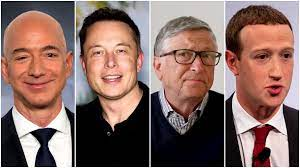

In [14]:
from IPython.display import Image
!pwd
Image('./keras-yolo3/persones.png')

In [25]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/yolov3/keras-yolo3')
! python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2022-04-26 09:27:35.447001: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-04-26 09:27:35.457284: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-04-26 09:27:35.457604: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ba7c8d12c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-26 09:27:35.457650: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-04-26 09:27:35.461073: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-26 09:27:35.474772: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-

In [26]:

! python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2022-04-26 09:30:29.683721: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-04-26 09:30:29.689493: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-04-26 09:30:29.689781: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5649df6e72c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-26 09:30:29.689821: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-04-26 09:30:29.691886: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-26 09:30:29.706338: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-

#[Problème 4] Créez un fichier pour l'apprentissage

In [27]:
import pandas as pd
! pwd
simpsons_annotation_original = pd.read_csv('./annotation.txt', header=None)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
simpsons_annotation_original[6] = label_encoder.fit_transform(simpsons_annotation_original[5])

display(simpsons_annotation_original.head())
display(simpsons_annotation_original.shape)
display(simpsons_annotation_original[5].unique())

/content/gdrive/MyDrive/Colab Notebooks/yolov3/keras-yolo3


,0,1,2,3,4,5,6
0,./characters/abraham_grampa_simpson/pic_0000.jpg,57,72,52,72,abraham_grampa_simpson,0
1,./characters/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,abraham_grampa_simpson,0
2,./characters/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,abraham_grampa_simpson,0
3,./characters/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,abraham_grampa_simpson,0
4,./characters/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,abraham_grampa_simpson,0


(6752, 7)

array(['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson',
       'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy',
       'edna_krabappel', 'homer_simpson', 'kent_brockman',
       'krusty_the_clown', 'lisa_simpson', 'marge_simpson',
       'milhouse_van_houten', 'moe_szyslak', 'ned_flanders',
       'nelson_muntz', 'principal_skinner', 'sideshow_bob'], dtype=object)

In [28]:
#write to class file
new_classes_file = open("/content/gdrive/MyDrive/Colab Notebooks/yolov3/keras-yolo3/model_data/simpsons_classes.txt", "w")

classes_list = simpsons_annotation_original[5].unique()
for i in range(len(classes_list)):
    new_classes_file.write("{}\n".format(classes_list[i]))

new_classes_file.close()


#write to annotation file
new_annotation_file = open("/content/gdrive/MyDrive/Colab Notebooks/yolov3/keras-yolo3/annotation.txt", "w")

for i in range(simpsons_annotation_original.shape[0]):
    new_annotation_file.write("{} {},{},{},{},{}\n".format(
        simpsons_annotation_original.iloc[i, 0], 
        simpsons_annotation_original.iloc[i, 1], 
        simpsons_annotation_original.iloc[i, 2], 
        simpsons_annotation_original.iloc[i, 3], 
        simpsons_annotation_original.iloc[i, 4], 
        simpsons_annotation_original.iloc[i, 6])
        )

new_annotation_file.close()

#[Problème 5] Confirmation que l'apprentissage est possible

In [ ]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/yolov3/keras-yolo3


In [29]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/yolov3/keras-yolo3')
! python convert.py -w yolov3.cfg ../yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2022-04-26 09:34:46.530645: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-04-26 09:34:46.536220: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-04-26 09:34:46.536469: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557eeef9b2c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-26 09:34:46.536508: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-04-26 09:34:46.538521: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-26 09:34:46.550935: E tenso

In [ ]:
! python train.py

Using TensorFlow backend.








2022-04-26 09:54:29.974684: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-04-26 09:54:29.979956: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-04-26 09:54:29.980213: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d3335632c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-26 09:54:29.980253: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-04-26 09:54:29.984432: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-26 09:54:29.997711: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-26 09:54:29.997765: I tensorflow/stream_exec